## My first EDA project
In this Notebook you will see how I work on the King County Housing Data from kaggle.<br>I will focus on the given exercise for which I chose my stakeholder to be:<br><br>Jennifer Montgomery	Buyer: High budget, wants to show off, timing within a month, waterfront, renovated, high grades year<br><br>I will form 2 hypotheses and proof them wright or wrong during my analysis to find the perfect house for Jennifer.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# load the data
df = pd.read_csv('data/kc_house_data.csv')

## 1. Understanding the date

In [3]:
# check how the data looks like. This could already give me an overview of what needs to be cleaned or what data could be useful
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Since date is an object type and I would like to use it, I will not drop it, I would convert it.

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Categorical data should be in the following columns 
- waterfront
- view
- condition
- grade

<br>These features are used to describe a condition by ranking. Or like waterfront using binary for yes or no. Identifying them is easy by looking at the quantiles (either 0 or an int.). But don't confuse this with a counted feature like floors, rooms,...

In [8]:
# looking for empty entry
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2. Hypothesis Generation

#### Stakeholder Profil:<br>
Jennifer Montgomery: High budget, wants to show off, timing within a month, waterfront, renovated, high grades year

#### Hypothesis:<br>
1. A younger house will have a higher grade and therefore would be more attractive for the stakeholder.
2. Houses with a waterfront are most expensive close to Seattle Downtown.

## 3. Exploring the data

In [9]:
# let's see if the price behaves on either a house with or without waterfront
fig = px.box(df, x= 'waterfront', y= 'price')
fig.show()

# you'll find the image in the images folder as "1_waterfront_boxplot"

Here you can already see that a house without a waterfront will have an average price of 450k. The average price with a waterfront is up to 1,4M.<br>
Good to know that my stakeholder could effort a house with a higher price and doesn't care about the price, because she likes to show of.

In [10]:
# I want to see how many houses are in each grade
df.grade.value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [11]:
# plotting to see how the grades distribute over the year the house was built
fig = px.histogram(df, x= 'yr_built', color= 'grade', nbins= 50, barmode= 'overlay')
fig.show()

# you'll find the image in the images folder as "2_yr_built"

The gap between 1930-1940 might refer to WW2 (not enough manpower and also other important things to focus on than building houses).<br>Higher grades 10-13 are less frequent looking at the count table and hovering over the histogram.<br>Since the histogram doesn't give me a good look at the date, I decided to also print a box plot.

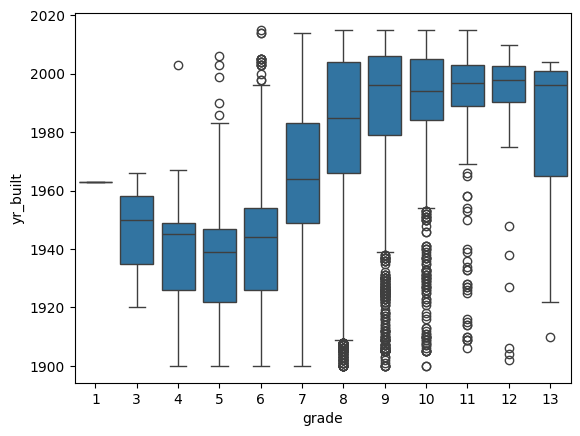

In [12]:
sns.boxplot(x= 'grade', y='yr_built', data= df)
plt.show()

### Regarding hypothesis 1
With the box plot I get a nicer presentation how the data is spreading. The boxes with the mean of each grade compared with the year a house was built is a prof for the first hypothesis. There are a few outliers but most of the younger houses have a higher grade.

## 4. Cleaning the data

In [13]:
# converting the date and cutting of the time (because it's unnecessary)
from datetime import datetime
df['date'] = pd.to_datetime(df['date']).dt.date
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


<Axes: xlabel='date', ylabel='price'>

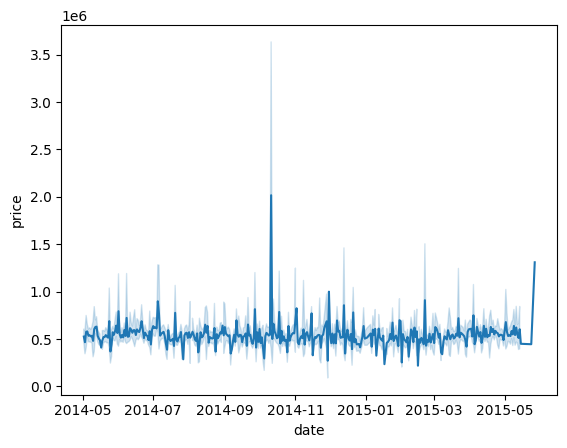

In [14]:
sns.lineplot(x= 'date', y= 'price', data= df)

Looking at the graph you can see a peak in October 2014 where the prices were doubled compared to the rest of the year.<br>The date column in this dataset can't be used like I wanted (finding a house which will be up for sale within a month, like my stakeholder asked for). All these houses in the dataset were sold in one year (2014-2015) and the date can't be used like expected. The only thing I could have recommended to my stakeholder would be to not buy a house in October. She should rather buy a house in August 2014 or February 2015.<br>I will focus on the other needs the stakeholder has.

In [15]:
# lets define higher prices for the waterfront above the average (which was 1.4M) to check the 2. hypothesis
water_price_df = df.query('waterfront == 1 and price >= 1400000')
water_price_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
300,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
540,622049114,2015-02-18,2125000.0,3,2.50,5403,24069,2.0,1,4,...,12,5403,0,1976,0,98166,47.4169,-122.348,3980,104374
656,3760500116,2014-11-20,3070000.0,3,2.50,3930,55867,1.0,1,4,...,8,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324
1152,4055701200,2015-04-21,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,2025069140,2015-03-17,1898000.0,3,2.50,2830,4334,3.0,1,4,...,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211
20325,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
20767,8043700105,2015-04-17,2300000.0,4,4.00,4360,8175,2.5,1,4,...,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525
21201,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1,4,...,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762


In [16]:
# plotting a map with the new data using plotly.express
color_scale = [(0, 'orange'), (1,'green')]

fig = px.scatter_mapbox(water_price_df, 
                        lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        hover_data=["price", "yr_built", "yr_renovated"],
                        color="price",
                        color_continuous_scale=color_scale,
                        size="price",
                        zoom=9, 
                        height=600,
                        width=700)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# you'll find the image in the images folder as "3_water_price"

### Regarding hypothesis 2
Houses with waterfront are very spread across the city but they are not in downtown Seattle. There are 2 houses very close to it (ID: 98144).

### Cleaning the data a bit more to fit the needs of the stakeholder

In [17]:
water_df =df.query('waterfront == 1')
water_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
230,8096000060,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1,4,...,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1,4,...,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267
300,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,2025069140,2015-03-17,1898000.0,3,2.50,2830,4334,3.0,1,4,...,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211
20325,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
20767,8043700105,2015-04-17,2300000.0,4,4.00,4360,8175,2.5,1,4,...,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525
21201,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1,4,...,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762


In [18]:
# taking at only houses which will fit the stakeholders needs
# to be a bit more specific we are just looking at houses built or renovated since 2000 and with a waterfront
water_yr_df = water_df.query('yr_renovated >= 2000 or yr_built >= 2000')
water_yr_df.sort_values(['grade'], ascending= False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
11402,3426049284,2014-08-19,2300000.0,4,3.25,4110,15929,2.0,1,4,...,12,2720,1390,2001,0,98115,47.6934,-122.271,2640,15929
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
7700,3761700053,2015-01-05,2150000.0,3,2.75,3470,9610,3.0,1,4,...,11,3470,0,1989,2000,98034,47.7205,-122.260,4130,11875
21201,518500460,2014-10-08,2230000.0,3,3.50,3760,5634,2.0,1,4,...,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762
2444,7524900003,2014-12-10,3278000.0,2,1.75,6840,10000,2.5,1,4,...,11,4350,2490,2001,0,98008,47.6042,-122.112,3120,12300
20325,518500480,2014-08-11,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4013,724069059,2014-05-09,2400000.0,3,2.25,3000,11665,1.5,1,4,...,11,3000,0,2001,0,98075,47.5884,-122.086,3000,15959
18455,8043700300,2014-06-08,2700000.0,4,3.25,4420,7850,2.0,1,4,...,11,3150,1270,2001,0,98008,47.5720,-122.102,2760,8525


In [19]:
color_scale = [(0, 'red'), (1,'blue')]

fig = px.scatter_mapbox(water_yr_df, 
                        lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        hover_data=["price", "bedrooms", "condition", "yr_built", "yr_renovated"],
                        color="grade",
                        color_continuous_scale=color_scale,
                        size="grade",
                        zoom=9, 
                        height=600,
                        width=700)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# you'll find the image in the images folder as "4_water_yr_built_yr_renovated"

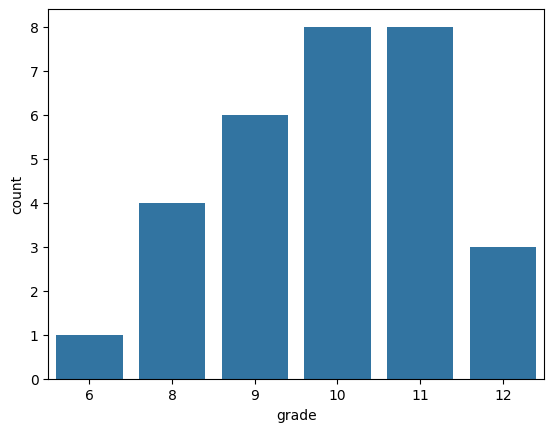

In [20]:
# plotting what grades are left after setting a filter
sns.countplot(x= 'grade', data= water_yr_df)
plt.show()

There are no new or renovated houses with waterfront for grade 13 anymore. But that's still okay. We have a lot high fitting houses left for the stakeholder.

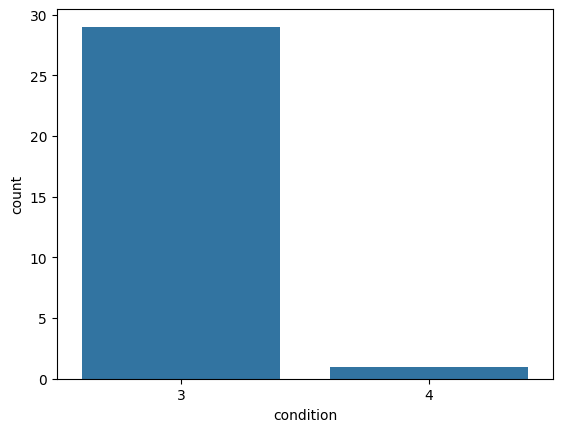

In [21]:
# plotting the count of the condition column to see what conditions are left in the filtered data
sns.countplot(x= 'condition', data= water_yr_df)
plt.show()

In [22]:
# lets add some more filter to recommend a house with a high grade which will be defined >=10 and add some more luxury
lux_df = water_yr_df.query('bedrooms >=3 and grade >=10 and sqft_living >=4500')
lux_df.sort_values(['condition', 'grade'], ascending= False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
6233,2024069008,2014-06-19,2200000.0,5,4.75,5990,10450,2.0,1,4,...,11,4050,1940,2002,0,98027,47.5554,-122.077,3330,14810
300,3225069065,2014-06-24,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
2864,4114601570,2014-11-18,3600000.0,3,3.25,5020,12431,2.0,1,4,...,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620
4486,1724069059,2014-05-24,2000000.0,5,4.00,4580,4443,3.0,1,4,...,10,4580,0,2004,0,98075,47.5682,-122.059,2710,4443
7989,9362000040,2014-06-23,3400000.0,3,4.50,5230,17826,2.0,1,4,...,10,3740,1490,2005,0,98040,47.5348,-122.243,3670,17826
21576,9253900271,2015-01-07,3567000.0,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270


In [23]:
color_scale = [(0, 'red'), (1,'orange')]

fig = px.scatter_mapbox(lux_df, 
                        lat="lat", 
                        lon="long", 
                        hover_name="id", 
                        hover_data=["price", "bedrooms", "condition", "yr_built", "yr_renovated"],
                        color="grade",
                        color_continuous_scale=color_scale,
                        size="grade",
                        zoom=9, 
                        height=600,
                        width=700)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# you'll find the image in the images folder as "5_top_recommendations"

Top 3 houses:<br>
1. ID: 7738500731
2. ID: 1924059029
3. ID: 9808700762<br>

With all three of them she can show of with an expensive house at a waterfront, more than 4500 square feet big, renovated in 2000 or later, high grades 11-12 of 13, in good condition ranked 3 of 5 and 5 bedrooms.